<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/California_housing_price_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download

https://medium.com/@iabbasali/day-6-30-days-machine-learning-projects-challenge-e934c2ca1abe

In [1]:
import pandas as p
df = p.read_csv('housing.csv')

In [2]:
df.head() #Gives the first 5 rows
df.tail() #Gives the last 5 rows
df.shape #Gives the shape of the dataset (rows, columns) -> (20640, 10)
df.isnull().sum() #Gives the count of null values present in each column (Output below)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Let’s know the type of data present in each of the columns using the info() method and also know the statistics of the dataset like max, min, std, and more using the describe() method.

In [5]:
df.info()
# df.describe() # very big

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see that we only have one categorical column called “ocean_proximity”, let us know how many unique values are there in it.

And also know how many times each value occurs in the dataset.

In [6]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

To know the value spread of each numerical column we are going to plot a histogram using the matplotlib library.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

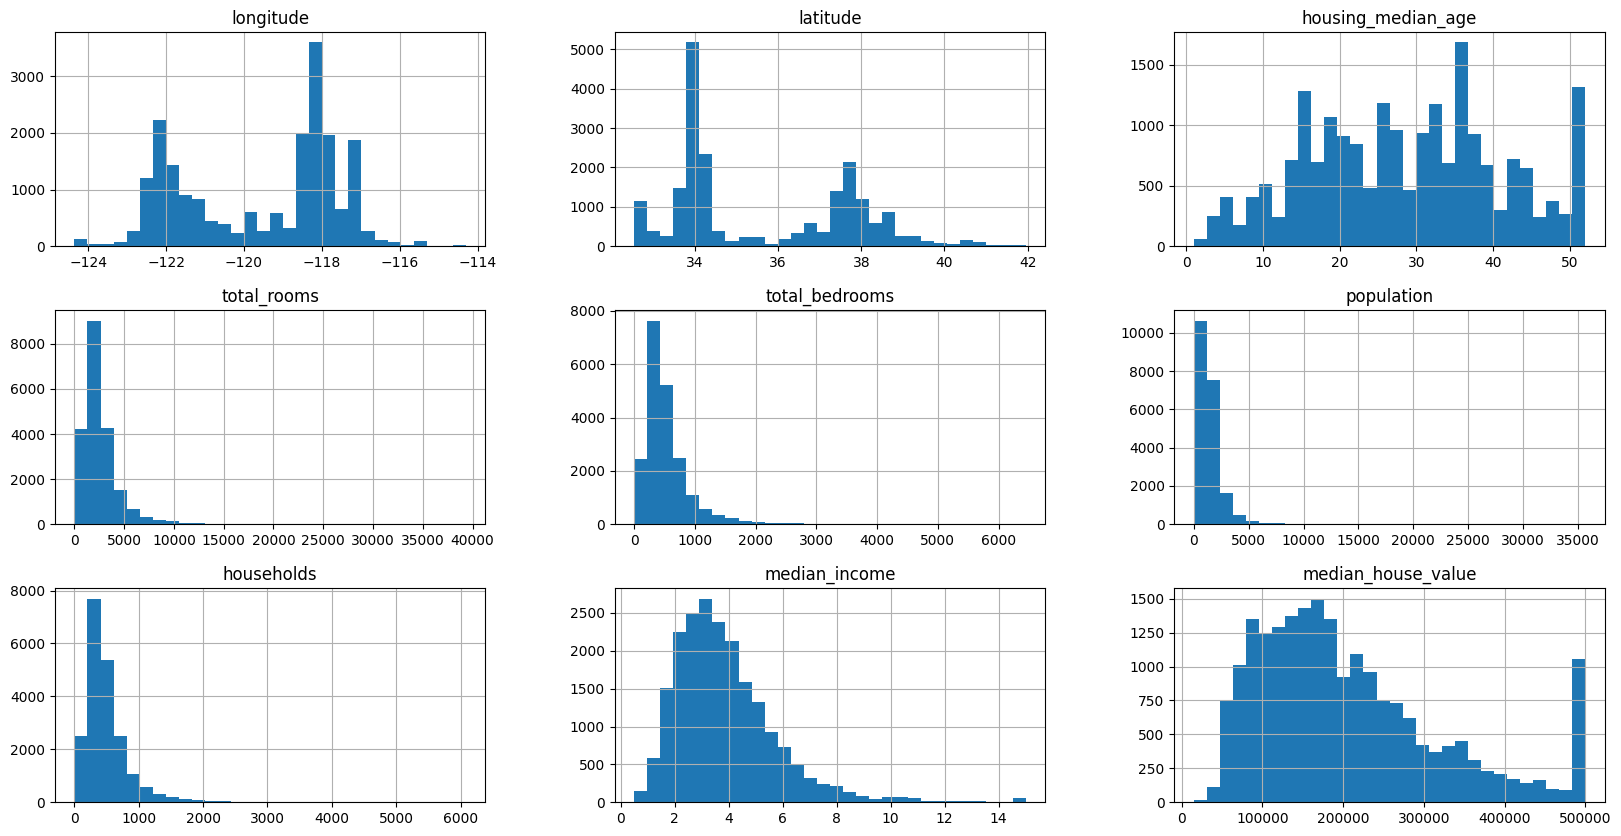

In [8]:
df.hist(bins=30, figsize=(20, 10))

We can see that most of our numerical columns are not standardized son we will standardize them after completing a few more steps.

Before moving on any further, we first need to set aside a test set. Let’s do that.

In [7]:
df1 = df.drop(['ocean_proximity'], axis=1) # drop the only categorical data
df1.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

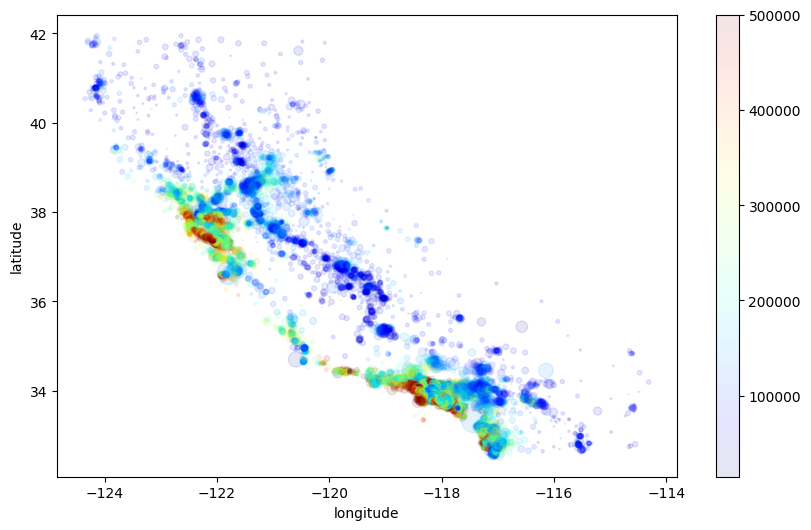

In [15]:
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 6), s=df['population']/100, alpha=0.1, cmap='jet', c=df['median_house_value'], colorbar='True')